# 확률 변수와 확률분포

## 확률 변수(random variable)

* 개별 근원사건에 실숫값을 대응시키는 함수를 확률변수라고 한다.
* 문자로 표시한다.
* 셀 수 있는 숫자로 변환하는 경우와 연속하는 숫자로 변환하는 경우가 있다.
* 이산확률변수: 정수나 실수 등 값이 유한하고 셀 수 있는 경우
* 연속확률변수: 연속하는 구간의 모든 값을 가지는 경우

## 확률분포(Probability distribution)

* 확률 변수의 값과 대응하는 확률값을 나타내는 표 또는 수식을 확률분포라고 한다.

## 이산확률: [lea 모듈을 사용](https://bitbucket.org/piedenis/lea/src/dev_lea3/)

In [1]:
!pip install lea

In [2]:
from lea import leaf
import lea
import numpy as np

### 주사위 던지기(leaf.dice)를 사용한 이산확률 만들기

#### 주사위를 한번 던지기

In [3]:
# 주사위를 한 번 던질 경우의 확률과 확률값을 구함. 
dice = leaf.dice(1, prob_type='r')  # 1:한 번 던짐, prob_type='r': 출력을 분수로 표시

In [4]:
dice
# 각각의 확률변수가 나올 확률

1 : 1/6
2 : 1/6
3 : 1/6
4 : 1/6
5 : 1/6
6 : 1/6

In [5]:
# 확률 변수 조회
dice.support

(1, 2, 3, 4, 5, 6)

In [6]:
# 주사위의 결과들이 나올 확률 확인
dice.ps

(1/6, 1/6, 1/6, 1/6, 1/6, 1/6)

In [7]:
# 모든 확률의 합은 1, 모든 근원사건의 합도 1
dice.p_sum

1

In [8]:
# 확률분포표를 만들기 위해 pandas 모듈 사용
import pandas as pd

In [9]:
# 값은 확률, 인덱스는 확률변수
df = pd.DataFrame(dice.ps, index=dice.support, columns=['f(dice)'])

In [10]:
# df값을 Transpose로 확인: Transpose index and columns.(행과 열을 바꿔서 한눈에 파악하도록 함)
df.T

,1,2,3,4,5,6
f(dice),1/6,1/6,1/6,1/6,1/6,1/6


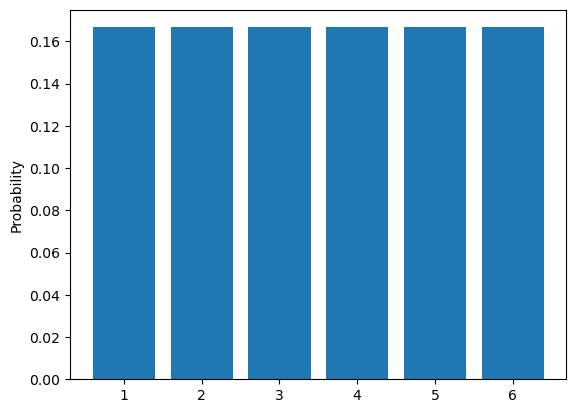

In [11]:
# 위의 dataframe와 관계없이 dice.ps, dice.support를 이용한 그래프를 그릴 수 있는 plot 함수 존재
dice.plot()

In [12]:
# 하나의 주사위를 굴려서 결과 확인
x = dice.random_draw(1)

In [13]:
x

(2,)

In [14]:
# 주사위 결과에 대한 확률
dice.p(x[0])

1/6

#### 주사위를 두 번 굴리는 경우

* 주사위를 두 번 굴려서 두 주사위의 합을 기준으로 확률을 확인
* 주사위를 두번 굴려서 발생하는 경우의 수는 36이며, 이중에서 합의 최소값은 2, 최대값은 12이다.

In [15]:
dice2 = leaf.dice(2, prob_type='r')

In [16]:
dice2

 2 : 1/36
 3 : 2/36
 4 : 3/36
 5 : 4/36
 6 : 5/36
 7 : 6/36
 8 : 5/36
 9 : 4/36
10 : 3/36
11 : 2/36
12 : 1/36

In [17]:
# 모든 확률값의 합은 1이다.
dice2.p_sum

1

In [18]:
# 데이터프레임으로 확률분포 확인
df2 = pd.DataFrame(dice2.ps, index=dice2.support, columns=['f(dice2)'])

In [19]:
# df2 값 확인
df2.T

,2,3,4,5,6,7,8,9,10,11,12
f(dice2),1/36,1/18,1/12,1/9,5/36,1/6,5/36,1/9,1/12,1/18,1/36


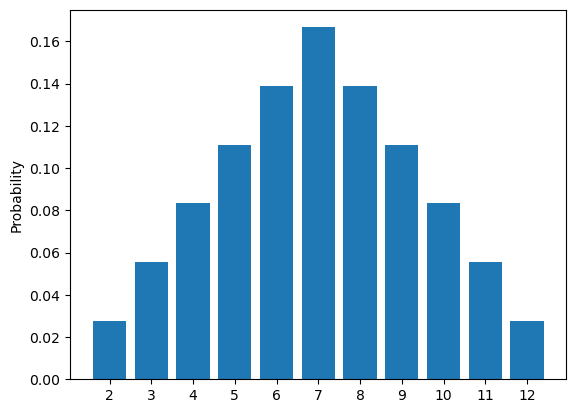

In [20]:
dice2.plot()

In [21]:
# 주사위를 굴려서 나온 결과 확인
x = dice2.random_draw(1) # 주사위를 한 번 던져서 나온 결과

In [22]:
x

(7,)

In [23]:
# 위 결과가 나온 확률
dice2.p(x[0])

1/6

### 특정 심벌(lea.vals)을 사용해서 이산확률 만들기

In [24]:
# 특정 이벤트를 영어 대문자, 출력을 분수로
symbol = lea.vals("A", "B", "B", "C", "C", "C", prob_type='r')

In [25]:
symbol

A : 1/6
B : 2/6
C : 3/6

In [26]:
# 확률값의 합계
symbol.p_sum

1

In [27]:
# 각 확률값을 모두 더하면 1
symbol.p('A') + symbol.p('B') + symbol.p('C')

1

### 확률질량함수(lea.pmf)를 이용해 이산확률 만들기

In [28]:
# 문자열을 키로, 발생할 개수는 값으로 딕셔너리에 넣어서 처리
symbol2 = lea.pmf({"A":1, "B": 2, "C": 3})

In [29]:
symbol2

A : 0.16666666666666666
B : 0.3333333333333333
C : 0.5

In [30]:
# 확률값의 합계
symbol2.p_sum

1.0

### 동전 던지기(lea.vals 이용)

* 동전의 앞면(Head), 뒷면(Tail)이 나올 확률

In [31]:
# 동전을 처리하는 이산확률 생성
flip = lea.vals('Head', 'Tail', prob_type='r')

In [32]:
flip

Head : 1/2
Tail : 1/2

In [33]:
flip.p_sum

1

In [34]:
# 확률을 구하는 함수 P에 flip이 뒷면인 경우를 전달해서 확률을 구한다.(방법1)
lea.P(flip == 'Tail')

1/2

In [35]:
# flip객체의 메소드를 이용하여 확률을 구한다.(방법2)
flip.p('Head')

1/2

In [36]:
# 데이터프레임을 사용해 확률분포표 만들기
df = pd.DataFrame(flip.ps, index=flip.support, columns=['coin'])

In [37]:
df.T

,Head,Tail
coin,1/2,1/2


### 동전 던지기 구현

In [38]:
import random

In [39]:
random.seed(100) # random에 전달되는 값이 동일한 경우 결과도 동일한 값을 가지기 위해서 seed사용
flip.random(5) # 동전을 5번 던져서 결과 확인

('Head', 'Head', 'Tail', 'Tail', 'Tail')

In [40]:
random.seed(200)
flip.random(5)

('Head', 'Head', 'Tail', 'Head', 'Tail')

In [41]:
random.seed(100) # 동일한 seed일 경우 동일한 결과
flip.random(5)

('Head', 'Head', 'Tail', 'Tail', 'Tail')

### 주사위의 결과가 짝수가 나올 확률 구하기

In [42]:
b = lea.P((dice==2) | (dice==4) | (dice==6))

In [43]:
b

1/2

In [44]:
# 주사위 굴리기의 결과가 짝수가 나왔을 때 2가 나온 경우를 계산
lea.P(dice==2) / lea.P((dice==2)|(dice==4)|(dice==6))

1/3

### 주사위의 결과가 특정값(4)이 나올 확률 구하기

In [45]:
# 방법 1. 4가 나올 확률
lea.P(dice==4)

1/6

In [46]:
# 방법 2. 짝수가 나올 확률
lea.P(dice % 2 == 0)

1/2

In [47]:
# 방법 3. 4가 나올 확률
dice == 4

False : 5/6
True  : 1/6

In [48]:
# 방법 4. 주사위 굴리기의 결과가 짝수가 나왔을 때 2가 나온 경우를 계산
# 특정조건이 주어졌을 경우 조건부 확률인 given을 사용한다. 
#  연속해서 조건부 확률이 주어질 때 다른 사건이 발생하는 것을 p 메소드 인자로 전달해 확률을 구한다.
dice.given((dice % 2 == 0)).p(4)

1/3

### 특정 범위의 숫자(lea.interval)를 확률로 표시(이산확률 만들기)

In [49]:
# 두개의 범위를 표시하는 숫자(1, 6)를 지정해서 이산확률 만들기 -> 주사위 한번 던지기와 동일한 결과
die1 = lea.interval(1, 6, prob_type='r')

In [50]:
# 기존 확률의 복사본 생성
die2 = dice.new()

In [51]:
# 두 확률 결합
die12 = lea.joint(die1, die2)

In [52]:
# 확률분포로 확인하기 위해서 데이터프레임으로 변환
df = pd.DataFrame(die12.ps, index=die12.support, columns=['dice joint'])

In [53]:
# df 확인(한눈에 보이도록 Transpose 함)
df.T

1                                   2                    ...  \
               1     2     3     4     5     6     1     2     3     4  ...   
dice joint  1/36  1/36  1/36  1/36  1/36  1/36  1/36  1/36  1/36  1/36  ...   

               5                       6                                
               3     4     5     6     1     2     3     4     5     6  
dice joint  1/36  1/36  1/36  1/36  1/36  1/36  1/36  1/36  1/36  1/36  

[1 rows x 36 columns]

In [54]:
die12.p_sum

1

In [55]:
# 특정 조건부 확률 구하기: 첫번째 주사위가 2보다 작은 수가 나올 조건부 확률을 구한다.
die12.given(die1<2)

(1, 1) : 1/6
(1, 2) : 1/6
(1, 3) : 1/6
(1, 4) : 1/6
(1, 5) : 1/6
(1, 6) : 1/6

In [56]:
# 조건부 확률의 합
die2.given(die1<2).p_sum

1